# Exercise 1

In [6]:
import numpy as np
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import pydicom as dicom
in_dir = "data/"
iris_data = np.loadtxt(in_dir + "irisdata.txt", comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


# Exercise 2

In [7]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

print("Variance of sepal Length: " + str(np.round(var_sep_l, 2)))
print("Variance of sepal Width: " + str(np.round(var_sep_w, 2)))
print("Variance of petal Length: " + str(np.round(var_pet_l, 2)))
print("Variance of petal Width: " + str(np.round(var_pet_w, 2)))

Variance of sepal Length: 0.12
Variance of sepal Width: 0.14
Variance of petal Length: 0.03
Variance of petal Width: 0.01


# Exercise 3

In [8]:
sepLfloat = sep_l.astype(float)
sepWfloat = sep_w.astype(float)

N = sepLfloat.size
sepL_mean = sepLfloat.mean()
sepW_mean = sepWfloat.mean()

cov_sepLsepW = np.sum((sepLfloat - sepL_mean) * (sepWfloat - sepW_mean)) / (N - 1)

print(f"Covariance(sepL, sepW) = {cov_sepLsepW:.6f}")

Covariance(sepL, sepW) = 0.099216


In [9]:
petLfloat = pet_l.astype(float)

petL_mean = petLfloat.mean()

cov_sepLpetL = np.sum((sepLfloat - sepL_mean) * (petLfloat - petL_mean)) / (N - 1)

print(f"Covariance(sepL, petL) = {cov_sepLpetL:.6f}")

Covariance(sepL, petL) = 0.016355


Both covariances are positive so if one variable increases the other tends to also increase. We cant however say if one varies more than the other because the covariance is relative to the measurements

In [10]:
import seaborn as sns
import pandas as pd

<Figure size 640x480 with 0 Axes>

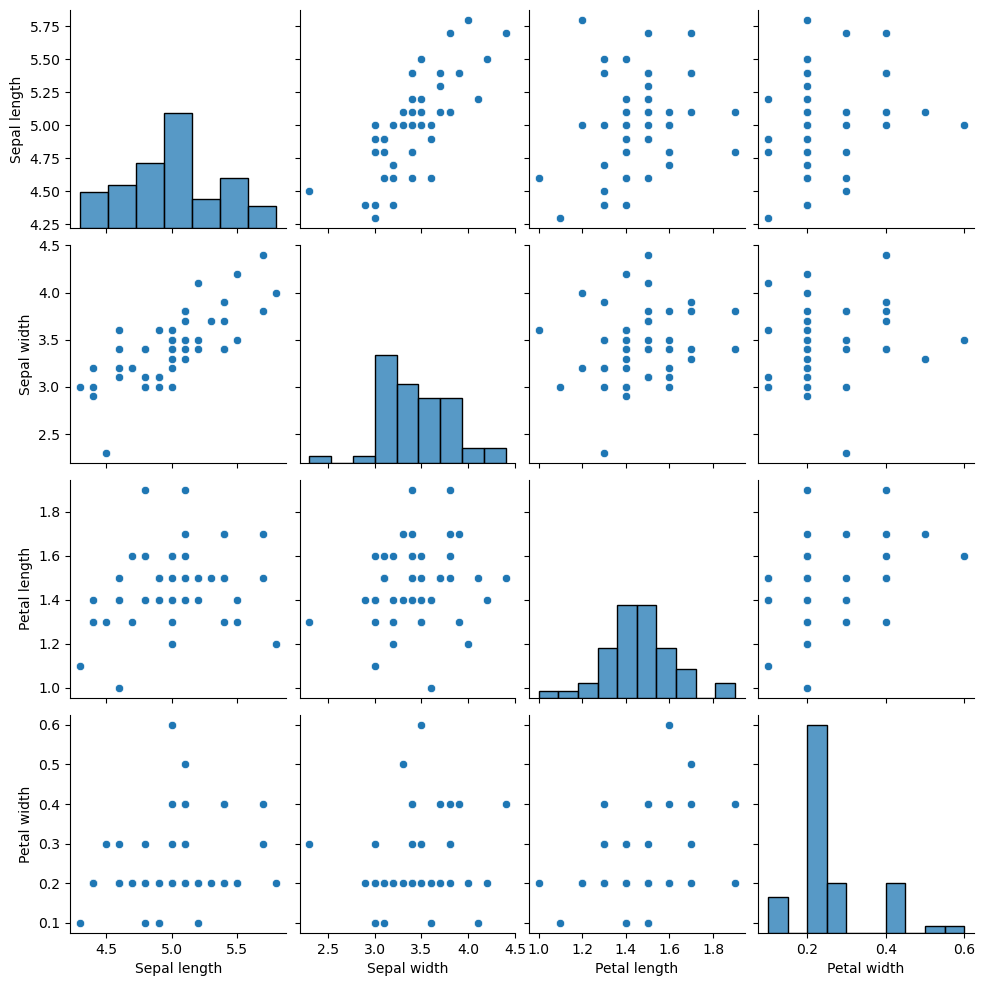

In [11]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=["Sepal length", "Sepal width",
							 "Petal length", "Petal width"])
sns.pairplot(d)
plt.show()

It is clear to see that sepal length and with are correlated. The other measurement do not look to have much connection.

Exercise 5

In [12]:
mn = np.mean(x, axis=0)
data = x - mn

N = data.shape[0]
C_manual = (data.T @ data) / (N - 1)

C_numpy = np.cov(data, rowvar=False, ddof=1)

# 4. Compare
print("Manual covariance matrix:\n", C_manual)
print("\nNumPy covariance matrix:\n", C_numpy)
print("\nDo they match? ->", np.allclose(C_manual, C_numpy))

Manual covariance matrix:
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]

NumPy covariance matrix:
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]

Do they match? -> True


Exercise 6

In [13]:
values, vectors = np.linalg.eig(C_manual)

print("\nEigenvalues:\n", values)
print("\nEigenvectors:\n", vectors)


Eigenvalues:
 [0.23645569 0.03691873 0.0267964  0.00903326]

Eigenvectors:
 [[ 0.6690784   0.59788401  0.43996277 -0.03607712]
 [ 0.73414783 -0.62067342 -0.27460747 -0.01955027]
 [ 0.0965439   0.49005559 -0.8324495  -0.23990129]
 [ 0.06356359  0.13093791 -0.19506751  0.96992969]]


Exercise 7

Percent variance explained by PC1: 76.47%
PC1: 76.47%
PC2: 11.94%
PC3: 8.67%
PC4: 2.92%


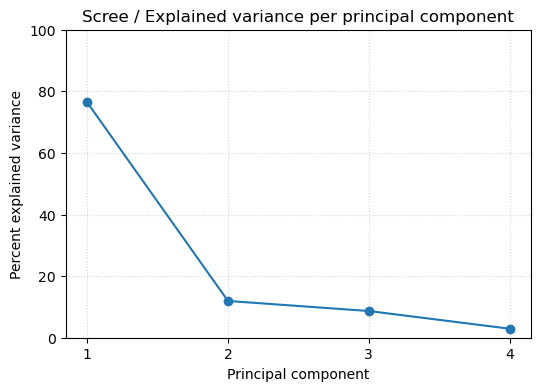

In [14]:
idx = np.argsort(values)[::-1]
eigvals = values[idx]
eigvecs = vectors[:, idx]

v_norm = eigvals / np.sum(eigvals) * 100    # percent

# print how much the first component explains
first_pc_percent = v_norm[0]
print(f"Percent variance explained by PC1: {first_pc_percent:.2f}%")

for i, pct in enumerate(v_norm, start=1):
    print(f"PC{i}: {pct:.2f}%")

# plot
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(v_norm)+1), v_norm, marker='o')   # x starts at 1 for readability
plt.xticks(np.arange(1, len(v_norm)+1))
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])
plt.title('Scree / Explained variance per principal component')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()


Exercise 8

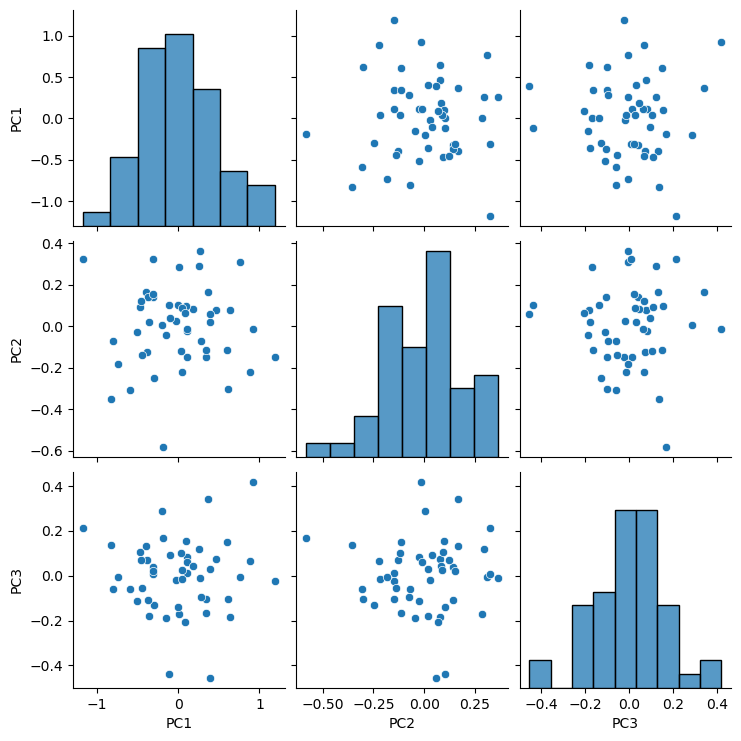

Covariance matrix in PCA space:
 [[ 2.36455690e-01  1.64798730e-17  5.17938866e-17 -8.50545541e-18]
 [ 1.64798730e-17  3.69187324e-02  2.63483254e-17  4.52267192e-18]
 [ 5.17938866e-17  2.63483254e-17  2.67963986e-02  3.86772530e-18]
 [-8.50545541e-18  4.52267192e-18  3.86772530e-18  9.03326055e-03]]


In [15]:
# 1. Project data into PCA space
pc_proj = vectors.T @ data.T     # shape: (d, N)
pc_proj = pc_proj.T              # shape: (N, d)

# 2. Put into DataFrame for seaborn
pc_df = pd.DataFrame(pc_proj, columns=[f"PC{i+1}" for i in range(pc_proj.shape[1])])

# (Optional) if you have class labels, add them
# from sklearn.datasets import load_iris
# iris = load_iris()
# pc_df["species"] = iris.target_names[iris.target]

# 3. Pairplot of first 3 principal components
sns.pairplot(pc_df.iloc[:, :3])   # just PC1, PC2, PC3 for clarity
plt.show()

# 4. Verify covariance structure
C_pc = np.cov(pc_proj, rowvar=False, ddof=1)
print("Covariance matrix in PCA space:\n", C_pc)

Exercise 9

In [16]:
from sklearn import decomposition

# sklearn PCA (no manual centering needed, sklearn does it internally)
pca = decomposition.PCA()
pca.fit(x)

# Eigenvalues (explained variance)
values_pca = pca.explained_variance_
# Explained variance ratio
exp_var_ratio = pca.explained_variance_ratio_
# Eigenvectors (principal axes)
vectors_pca = pca.components_
# Projected data in PCA space
data_transform = pca.transform(x)

print("Sklearn eigenvalues (explained variance):\n", values_pca)
print("\nSklearn explained variance ratio:\n", exp_var_ratio)
print("\nSklearn eigenvectors (components):\n", vectors_pca)
print("\nProjected data (first 5 rows):\n", data_transform[:5])

# ---- Compare with manual results ----
print("\nDo eigenvalues match manual eigvals? ->",
      np.allclose(np.sort(values_pca)[::-1], eigvals))

# sklearn uses rows for eigenvectors, numpy uses columns:
for i in range(eigvecs.shape[1]):
    same = np.allclose(vectors_pca[i, :], eigvecs[:, i])
    opposite = np.allclose(vectors_pca[i, :], -eigvecs[:, i])
    print(f"Component {i+1}: same? {same}, opposite sign? {opposite}")


Sklearn eigenvalues (explained variance):
 [0.23645569 0.03691873 0.0267964  0.00903326]

Sklearn explained variance ratio:
 [0.7647237  0.11939924 0.0866625  0.02921456]

Sklearn eigenvectors (components):
 [[ 0.6690784   0.73414783  0.0965439   0.06356359]
 [-0.59788401  0.62067342 -0.49005559 -0.13093791]
 [-0.43996277  0.27460747  0.8324495   0.19506751]
 [-0.03607712 -0.01955027 -0.23990129  0.96992969]]

Projected data (first 5 rows):
 [[ 0.10684237  0.02489398 -0.08216974 -0.03454175]
 [-0.39404723 -0.16586593 -0.13148092 -0.01755119]
 [-0.39068773  0.12685112 -0.07181182  0.0097443 ]
 [-0.51170158  0.02656106  0.11121361 -0.03267321]
 [ 0.11334931  0.14674972 -0.01071271 -0.03288907]]

Do eigenvalues match manual eigvals? -> True
Component 1: same? True, opposite sign? False
Component 2: same? False, opposite sign? True
Component 3: same? False, opposite sign? True
Component 4: same? True, opposite sign? False
